In [127]:
# import pandas and geopandas
import pandas as pd
import geopandas as gpd

In [128]:
# read neighborhood shape file
neighborhood_map = gpd.read_file("Neighborhoods_.shp")

In [ ]:
# read final scores dataset
neighborhood_scores = pd.read_csv('finalScores.csv')

First, lets start off by checking out the data we all collected for each neighborhood based on each of our metrics.

In [130]:
neighborhood_scores.head(5)

,Neighborhood,Crime Overall Score,Park Overall Score,Education Overall Score
25,East Carnegie,1.000000,0.17,0.14
68,Ridgemont,0.894444,0.00,0.14
29,Esplen,1.000000,0.17,0.15
67,Regent Square,1.000000,0.00,0.98
4,Arlington Heights,0.800617,0.00,0.08


As we can see, we have an overall crime, park, and education score for each neighborhood, all on a scale of 1.

Now all we have to do is use this data to find an average overall score for each neighborhood. Lets add this data directly into our shape file.

In [145]:
neighborhood_map['Crime Overall Score'] = 0
neighborhood_map['Park Overall Score'] = 0
neighborhood_map['Education Overall Score'] = 0
neighborhood_map['Neighborhood Overall Score'] = 0

# iterating through both data frames to match each neighborhood
for i, row in neighborhood_map.iterrows():
    for j, scores in neighborhood_scores.iterrows():
        if (row['hood'] == scores['Neighborhood']):
            # adding all three data points for each neighborhood
            neighborhood_map.at[i,'Crime Overall Score'] = float(scores['Crime Overall Score'])
            neighborhood_map.at[i,'Park Overall Score'] = float(scores['Park Overall Score'])
            neighborhood_map.at[i,'Education Overall Score'] = float(scores['Education Overall Score'])
            neighborhood_map.at[i,'Neighborhood Overall Score'] = float((scores['Crime Overall Score'] + scores['Park Overall Score'] + scores['Education Overall Score'])/3.0)

neighborhood_map = neighborhood_map.sort_values('Neighborhood Overall Score', ascending = False)
neighborhood_map.head(5)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,Crime Overall Score,Park Overall Score,Education Overall Score,Neighborhood Overall Score
67,69,215.0,42,003,141000,1,420031410001,Block Group 1,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.360984e+06,16004.734291,"POLYGON ((-79.89709 40.42765, -79.89661 40.427...",1.000000,0.00,0.98,0.660000
40,42,97.0,42,003,191600,3,420031916003,Block Group 3,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,4.070408e+07,32742.447523,"POLYGON ((-80.02121 40.42342, -80.02111 40.423...",0.717463,1.00,0.18,0.632488
35,37,83.0,42,003,141100,1,420031411001,Block Group 1,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.337917e+07,20791.544629,"POLYGON ((-79.89157 40.42674, -79.89201 40.426...",0.709722,0.17,0.98,0.619907
15,17,20.0,42,003,170600,1,420031706001,Block Group 1,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.997302e+07,26531.433744,"POLYGON ((-79.99713 40.42920, -79.99547 40.428...",0.580417,1.00,0.22,0.600139
18,20,34.0,42,003,562900,1,420035629001,Block Group 1,G5030,S,...,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,4.413393e+07,42027.889438,"POLYGON ((-79.95505 40.42713, -79.95498 40.427...",0.700222,0.83,0.14,0.556741


We now have each neighborhoods overall score, as well as their scores for each individual metric. 

Since this data is hard to read, lets get our final scores into a seperate data frame.

In [148]:
neighborhood_final_scores = neighborhood_map[['hood','Neighborhood Overall Score','Park Overall Score','Crime Overall Score','Education Overall Score']]
neighborhood_final_scores = neighborhood_final_scores.rename(columns = {'hood':'Neighborhood'})
neighborhood_final_scores = neighborhood_final_scores.sort_values('Neighborhood Overall Score',ascending = False)
neighborhood_final_scores.head(5)

,Neighborhood,Neighborhood Overall Score,Park Overall Score,Crime Overall Score,Education Overall Score
67,Regent Square,0.660000,0.00,1.000000,0.98
40,Beechview,0.632488,1.00,0.717463,0.18
35,Swisshelm Park,0.619907,0.17,0.709722,0.98
15,South Side Slopes,0.600139,1.00,0.580417,0.22
18,Hazelwood,0.556741,0.83,0.700222,0.14


As we can now see better, Regent Square has the highest overall score out of all the neighborhoods. 

Lets plot these overall scores for a better visual.

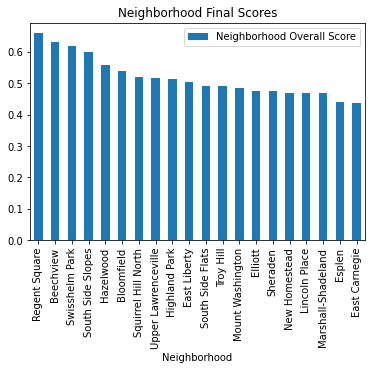

In [149]:
final_scores_bar = neighborhood_final_scores.iloc[:20].plot(kind='bar', x="Neighborhood", y="Neighborhood Overall Score", title="Neighborhood Final Scores")

Now, lets check out our final map of Pittsburgh based on these overall neighborhood values.

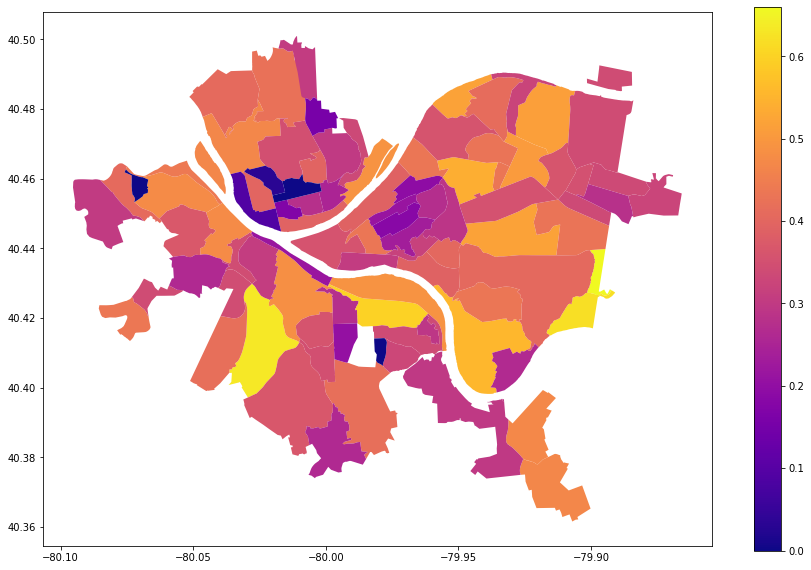

In [150]:
neighborhood_map.plot(column='Neighborhood Overall Score', legend = True, figsize =(15,10), cmap = "plasma")